In [1]:
### juwMyxUbyxb5eAyxM59K my API key
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

In [4]:
# Set my API key
quandl.ApiConfig.api_key = "juwMyxUbyxb5eAyxM59K"
# grab my data
data = quandl.get("CUR/JPY", start_date="2010-01-01", end_date="2020-11-02")

In [5]:
data.head()

,RATE
DATE,
2010-01-01,92.910732
2010-01-02,92.741464
2010-01-03,92.741464
2010-01-04,92.647589
2010-01-05,91.664585


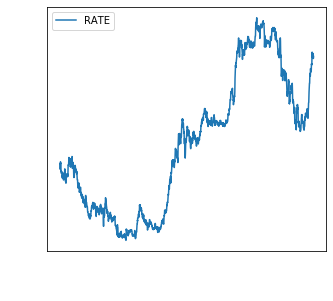

In [21]:
# Setting the size of our graph
data.plot(figsize=(5,5))
# set the name of the Y-axis
plt.ylabel("USD/JPY Exchange Rate", color= "white")
plt.xlabel("Date", color = "white")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [24]:
data['MA3'] = data['RATE'].shift(1).rolling(window=3).mean()
data['MA9'] = data['RATE'].shift(1).rolling(window=9).mean()

In [25]:
data = data.dropna()

X = data[['MA3', 'MA9']]

X.head()

,MA3,MA9
DATE,,
2010-01-10,93.117109,92.720988
2010-01-11,93.022906,92.737693
2010-01-12,92.755619,92.671386
2010-01-13,92.120424,92.495167
2010-01-14,91.561140,92.354683


In [27]:
y = data['RATE']

y.head()

DATE
2010-01-10    93.061079
2010-01-11    92.144699
2010-01-12    91.155493
2010-01-13    91.383229
2010-01-14    91.340921
Name: RATE, dtype: float64

In [28]:
training = 0.8
t = int(training*len(data))

# training dataset
X_train = X[:t]
y_train = y[:t]

# test dataset
X_test = X[t:]
y_test = y[t:]

In [30]:
model = LinearRegression(normalize=True).fit(X_train, y_train)

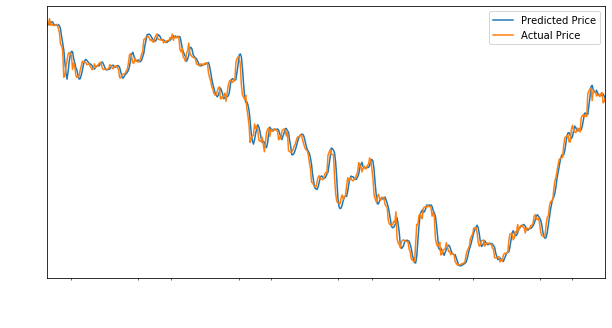

In [33]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index= y_test.index, columns = ['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel('USD/JPY Exchange Rate', color='white')
plt.xlabel("Date", color = "white")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

### Well this isn't as good as it looks

There is definitely some overfitting ocurring in this model. We didn't remove the time trend from the data which is causing a really high R-squared score. This means our model has no predictive power. So we will need to remove the time trend from the data in order for it to have predictive power. It also appears that we obtained this result because it is just the autocorrelation of t-1. Which just replays the preious days result. So, let's give this model more predictive power by fixing these issues. 